In [1]:
from scipy import stats,special
import numpy as np
import pandas as pd
from math import sqrt, pi, exp
import matplotlib.pyplot as plt
from scipy import optimize
import pickle
import csv

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 15
probability that in a single year are observed >=2 hurricanes ->   0.02275013194817921  = level of significance
p-value = = probability that in a single year are observed >=15 hurricanes -> 0.002217122790073467
pvalue <<< alfa --> the number of hurricanes in 2005 is significantly larger than the number of the other years


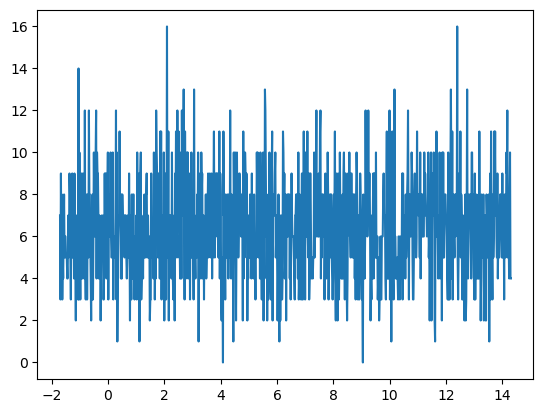

In [3]:
# Ho =  the number of hurricanes in 2005 is  signficantly larger than the other years 

#goal -> verifying Ho by computing the probability that in a single year are observed 15 or more hurricances. 

#average number of hurricanes is 6.3
mu = 6.3
#the number of hurricanes follows the poisson distribution -> std_dev = sqrt(mean)
sigma_mu = sqrt(mu)
# Z score
Z = 15
print("Z =", Z)

#level of significance = P(Z >= 2) with respect a normal distribution
alfa = 0.022
#Verify that the probability that in a single year are observed >=2 hurricanes is = alfa 
P = 1. - stats.norm.cdf(2)
print("probability that in a single year are observed >=2 hurricanes ->  ", P, " = level of significance")


# calculate the p-value (= the probability that in a single year are observed >=15 hurricanes)
#I use the probability mass function of the Poisson and the value of Z_score found -> it's one tailed
less_than_15 = 0
for i in range(0,15):
    less_than_15 +=  stats.poisson.pmf(i, mu)
pvalue = 1. - less_than_15
#alternative way -> pvalue = 1-stats.poisson.cdf(14,mu)
print("p-value = = probability that in a single year are observed >=15 hurricanes ->", pvalue)
if pvalue <= alfa: 
    print("pvalue <<< alfa --> the number of hurricanes in 2005 is significantly larger than the number of the other years")
else: 
    print("pvalue > alfa -> the number of hurricanes in 2005 is NOT significantly larger than the number of the other years")
    print("it's similar to number in other years")

#optional -> generating 100 random values according to Poisson distribution, with mu
values = stats.poisson.rvs(mu, size=1000)
x = np.linspace(mu - 8, mu + 8, 1000)
plt.plot(x, values)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T_score = -3.786997938137629
p-value = 0.004302464132864604
pvalue < alfa --> the change in blood pressures within our sample is NOT statistically significant


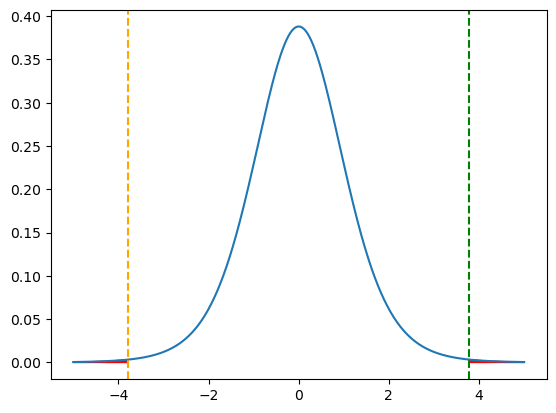

In [11]:
# Ho = the change in blood pressures within our sample is statistically significant
#The level of significance is set by convention at 5%
alfa = 0.05

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = 10 # the size of the data samples


# calculate the variance and its sqrt() = sigma
var_pre = np.var(pre, ddof=1)
var_post = np.var(post, ddof=1)
sigma = np.sqrt((var_pre + var_post)/2)

pre_bar = np.mean(pre)
post_bar = np.mean(post)

# calculate the T score with the test statistics
T = (pre_bar - post_bar) / (sigma * np.sqrt(2/n))
print("T_score =", T)


# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
if pvalue <= alfa: 
    print("pvalue < alfa --> the change in blood pressures within our sample is NOT statistically significant")
else: 
    print("pvalue > alfa -> the change in blood pressures within our sample is statistically significant")

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='red')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='green')
plt.show()


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

SSR for min:
 4th degree: 145.98640248640322 5th degree: 63.16186754422268
SSR for max:
 4th degree: 10.381118881118923 5th degree: 6.93994241053094

Test for min_temperatures 4th vs 5th:
pvalue min 4th vs 5th:0.012
additional parameter necessary: YES -> we need 5th degree function
pvalue max 4th vs 5th: 0.082
additional parameter necessary: NO ->  it's ok the 4th degree function

Perform chi_2 test
n degrees of freedom = 11
chi2_max = -0.006226739365878451
chi2_min = 0.2237088366161266
p-value for fitting of max temperatures = 1.0
p-value for fitting of min temperatures = 0.9999999814938524
If the p-value is < 0.05, the fit is considered unsatisfactory
p_value_min < 0.05  False
p_value_max < 0.05  False
Is the time offset for min and max temperatures the same within the fit accuracy?
yes


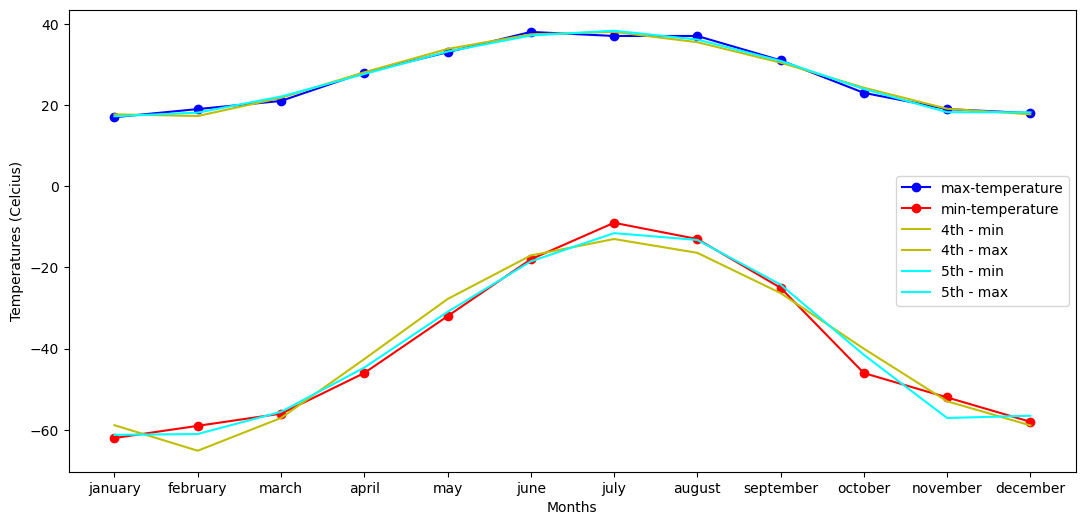

In [13]:
max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
N = 12
months = np.array(["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"])
fig = plt.figure(figsize=(13, 6))
#PLOT OF TEMPERATURES
plt.plot(months, max, marker = "o", color = "blue", label = "max-temperature")
plt.plot(months, min, marker = "o", color = "red", label = "min-temperature")
plt.xlabel("Months")
plt.ylabel("Temperatures (Celcius)")

#months are represented by the interval [0;11]
x = np.arange(12)

#Find a suitable a function that can describe min and max temperatures
'''we define different fitting functions 
   Observing the plots we can already say that a linear function doesn't fit the temperatures 
   So we use 4th, 5th, 6th degree fit functions
'''
def f4(xx, a0, a1, a2, a3, a4):
    return a0 + a1 * xx + a2 * xx**2 + a3 * xx**3 + a4 * xx**4
def f5(xx, a0, a1, a2, a3, a4, a5):
    return a0 + a1 * xx + a2 * xx**2 + a3 * xx**3 + a4 * xx**4 + a5 * xx**5
'''
OBS: Trying to fit values with a 6th-degree function takes to overflow
def f6(xx, a0, a1, a2, a3, a4, a5, a6):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * xx**4 + a5 * xx**5 + a6 ** xx**6
    
(fa0, fa1, fa2, fa3, fa4, fa5, fa6), cov = optimize.curve_fit(f6, x, min)
y6min = f6(x, fa0, fa1, fa2, fa3, fa4, fa5, fa6)
plt.plot(x, y6min, color='lightblue', label="6th")
'''

#Fit temperature-functions:

#4TH DEGREE
# min-fit with function of 4th grade
(fa0, fa1, fa2, fa3, fa4), cov = optimize.curve_fit(f4, x, min)
y4min = f4(x, fa0, fa1, fa2, fa3, fa4)
plt.plot(x, y4min, color='y', label="4th - min")
# max-fit with function of 4th grade
(fa0, fa1, fa2, fa3, fa4), cov = optimize.curve_fit(f4, x, max)
y4max = f4(x, fa0, fa1, fa2, fa3, fa4)
plt.plot(x, y4max, color='y', label="4th - max")

#5TH DEGREE
# min-fit with function of 5th grade
(fa0, fa1, fa2, fa3, fa4, fa5), cov = optimize.curve_fit(f5, x, min)
y5min = f5(x, fa0, fa1, fa2, fa3, fa4, fa5)
plt.plot(x, y5min, color='cyan', label="5th - min")
# max-fit with function of 5th grade
(fa0, fa1, fa2, fa3, fa4, fa5), cov = optimize.curve_fit(f5, x, max)
y5max = f5(x, fa0, fa1, fa2, fa3, fa4, fa5)
plt.plot(x, y5max, color='cyan', label="5th - max")


plt.legend( loc="best")

#we want to declare the best fit between 4th and  5th degree functions
'''
F-TEST: The test iteratively compares one reference function (in this case it's of 4th degree) and the function 
        with one more parameter (5th degree) to determine whether or not the additional parameter is needed
'''
ssr_4min = np.sum((y4min - min)**2)
ssr_4max = np.sum((y4max - max)**2)
ndof_4 = 3 # n of parameters - 1

ssr_5min = np.sum((y5min - min)**2)
ssr_5max = np.sum((y5max - max)**2)
ndof_5 = 4

# define a function that performes the F-test
alpha = 0.05
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    return pval

print("SSR for min:\n", "4th degree:", ssr_4min, "5th degree:",ssr_5min)
print("SSR for max:\n", "4th degree:", ssr_4max, "5th degree:",ssr_5max)

# run F-test
# test f4 vs f5
print("\nTest for min_temperatures 4th vs 5th:")

pval_4_vs_5_min = Ftest(ssr_4min, ssr_5min, ndof_4, ndof_5, N)
print("pvalue min 4th vs 5th:%.3f" % pval_4_vs_5_min)
print("additional parameter necessary:", "YES -> we need 5th degree function" if pval_4_vs_5_min  < alpha else "NO -> it's ok the 4th degree function")

pval_4_vs_5_max = Ftest(ssr_4max, ssr_5max, ndof_4, ndof_5, N)
print("pvalue max 4th vs 5th: %.3f" % pval_4_vs_5_max)
print("additional parameter necessary:", "YES -> we need 5th degree function" if pval_4_vs_5_max < alpha else "NO ->  it's ok the 4th degree function")



#Plot the result of the fitting. Is the fit reasonable? If not, why? 
''' 
The fit with a 5th degree function is reasonable for both min temperatures and max temperatures 
The 4th degree function was sufficient to model data only with max temperatures.
We've used the F-test to establish if more parameters where needed  to fit data.

The  𝜒2   goodness of fit test is used to determine whether the sample data is consistent with a certain model 
We can use it to establish the goodness of fit with 5th-degree function
'''
#find uncertainties
sigma_tmin = np.sqrt(np.abs(min))
sigma_tmax = np.sqrt(np.abs(max))

# set the number of degrees of freedom
ndof = len(x) - 1
print("\nPerform chi_2 test\nn degrees of freedom =", ndof)

# calculate the chi^2
chi2_max = np.sum(((max - y5max) / sigma_tmax**2))
chi2_min = np.sum(((min - y5min) / sigma_tmin**2))
print("chi2_max =", chi2_max)
print("chi2_min =", chi2_min)
# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue_max = 1. - stats.chi2.cdf(chi2_max, ndof)
pvalue_min = 1. - stats.chi2.cdf(chi2_min, ndof)
print("p-value for fitting of max temperatures =", pvalue_max) # if the p-value is < 0.05, the fit is considered unsatisfactory
print("p-value for fitting of min temperatures =", pvalue_min) 

print("If the p-value is < 0.05, the fit is considered unsatisfactory")
print("p_value_min < 0.05 ", pvalue_min < 0.05)
print("p_value_max < 0.05 ", pvalue_max < 0.05)

#Is the time offset for min and max temperatures the same within the fit accuracy?
print("Is the time offset for min and max temperatures the same within the fit accuracy?")
print("yes" if y5min.argmax()-y5min.argmin() == y5max.argmax()-y5max.argmin() else "no")


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
num of residuals:  11131 
num of bins chosen:  16
Min residual: -160.8499999999989 Max residual: 11.32000000000005
Poisson uncertainty for each bin
 [ 5.91607978  6.55743852  8.06225775  9.43398113 11.5758369  16.43167673
 23.68543856 77.46612163 57.53259945 16.21727474  9.21954446  4.47213595
  3.16227766  2.          1.41421356  1.        ]
chi2 = 12.509241047443986
p-value for fitting of residuals = 0.6401461276063263
If the p-value is < 0.05, the fit is considered unsatisfactory
p_value< 0.05  False


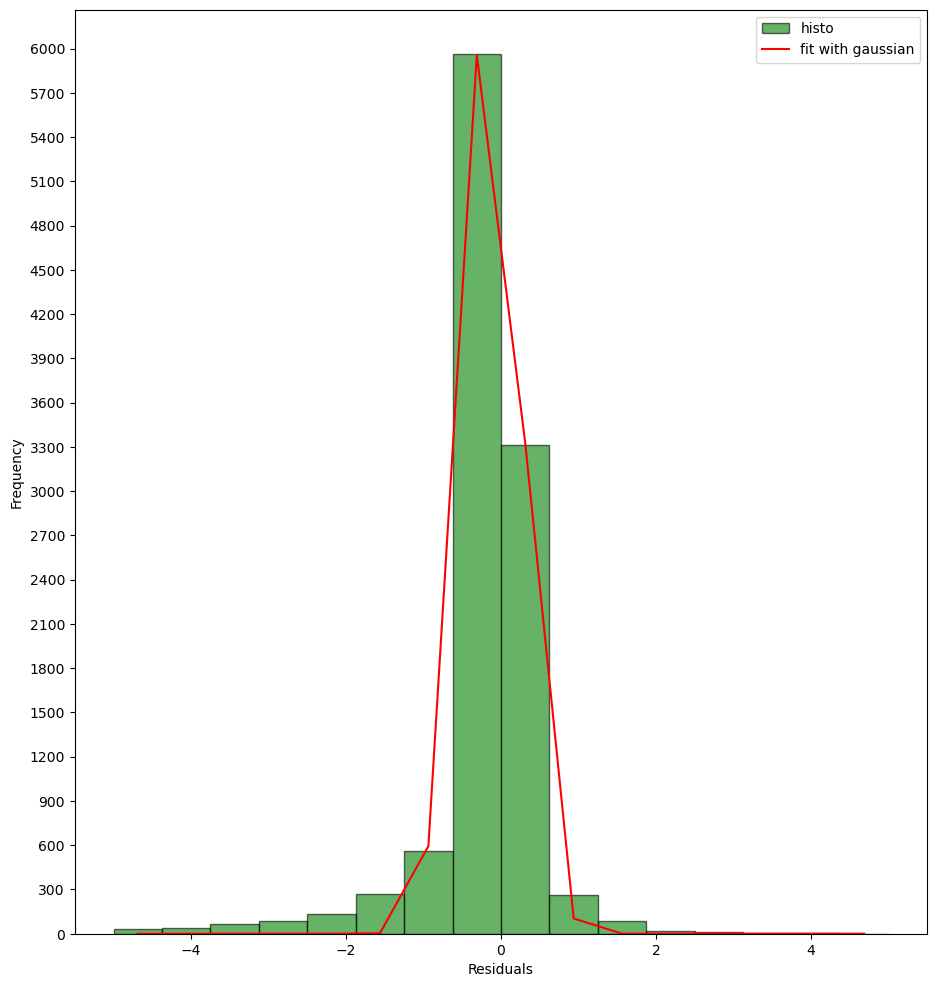

In [2]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
filename = "data/residuals_261.pkl"
with open(filename, mode='rb') as f:
    dict = pickle.load(f).tolist()
    data = pd.DataFrame(dict)
    print(data)
    
nbins = 16
print("num of residuals: ", data["residuals"].shape[0], "\nnum of bins chosen: ", nbins)
#Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
fig, ax = plt.subplots(figsize=(11,12)) # create the figure and the axes
print("Min residual:", data['residuals'].min(), "Max residual:", data['residuals'].max())
hist, bins, _ = ax.hist(data['residuals'], bins=nbins, range=(-5,5), density=False, label="histo",cumulative=False, color='green',edgecolor='black', alpha=0.6) 
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")
ax.yaxis.set_major_locator(plt.MultipleLocator(300)) 

#Set the appropriate Poisson uncertainty for each bin 
centers = 0.5*(bins[1:]+bins[:-1])
poisson_uncertainty = np.zeros(nbins)
for i in range(1,len(bins)):
    mask = (data["residuals"]<= bins[i]) & (bins[i-1] <= data["residuals"])
    slice = data["residuals"][mask] 
    poisson_uncertainty[i-1]  = sqrt(slice.shape[0]) 
#I could also write -- > sigma = np.sqrt(np.abs(hist))
print("Poisson uncertainty for each bin\n", poisson_uncertainty)

#By looking at the distribution of the residuals, define an appropriate function 
#and fit it to the histogram of the residuals
'''the histogram has a bell shape --> I try to fit it with a gaussian function'''
def f(xx, A,mu, sigma):
    return A * np.exp( - (xx - mu)**2 / (2*sigma ** 2))  

p, cov = optimize.curve_fit(f,centers,hist, absolute_sigma=True)
y = f(centers, p[0], p[1], p[2])
ax.plot(centers,y, color="red", label="fit with gaussian")
plt.legend()
'''
p, cov = optimize.curve_fit(chi,centers,hist, absolute_sigma=True)
y = chi(centers, p[0])
ax.plot(centers,y, color="red", label="fit")
plt.legend()'''

#Perform the  𝜒2  goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?
ndof = len(hist) - 1
# calculate the chi^2
chi2 = np.sum(((hist - y) / poisson_uncertainty**2))
print("chi2 =", chi2) 
# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value for fitting of residuals =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory


print("If the p-value is < 0.05, the fit is considered unsatisfactory")
print("p_value< 0.05 ", pvalue  < 0.05)

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

the best-fit values  of parameters (computed with f)are:
a = -10.02 +- 0.16 
b = 12.33 +- 0.02 
c = 9.35 +- 0.11

overall average temperature in Munich with original data:  9.352349012705366 °C
overall average temperature in Munich with predicted values:  9.352349013838667 °C
the typical daily average values predicted by the model for the coldest and hottest time of year:

the fit values of parameters (computed with g) are:
a = -10.02 +- 0.16 
b = 1.00 +- 0.00 
c = 17.76 +- 21.99

RSS for f:  40376.57222825893 
RSS for g:  40375.279977009515

pvalue f vs g:0.809
additional parameter necessary: NO -> the additional parameter isn't needed


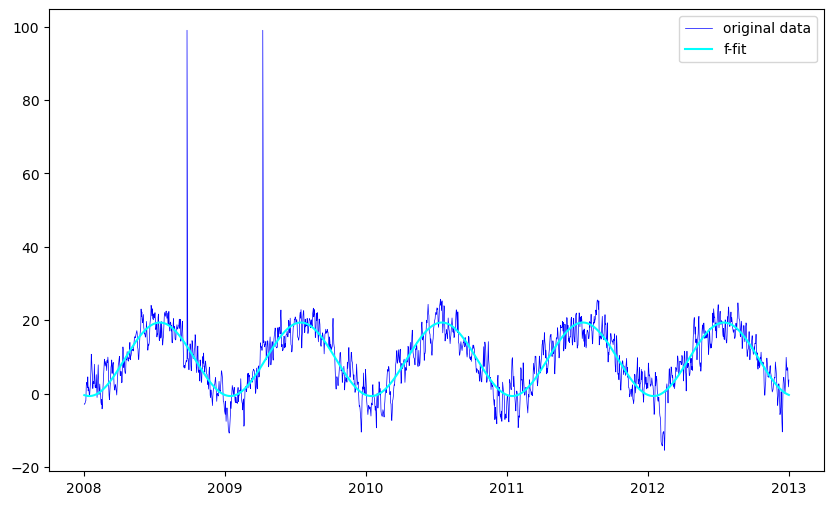

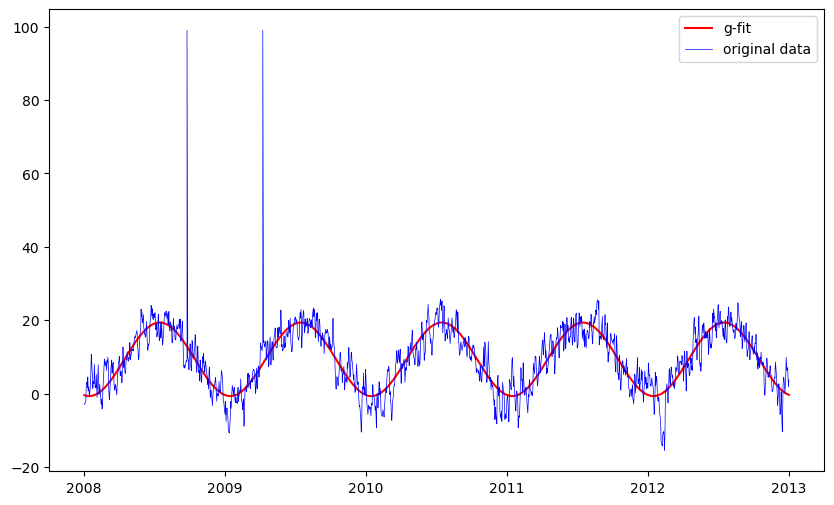

In [3]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/
#!cat data/munich_temperatures_average_with_bad_data.txt
filename = "data/munich_temperatures_average_with_bad_data.txt"
def f(t,a,b,c):
    return a*np.cos(2*pi*t + b) + c
def g(t,a,b,c,d):
    return a*np.cos(2*pi*t*b + c) + d

values = []
with open(filename) as file:
    i = 0
    data = csv.reader(file, delimiter=' ')
    for line in data:
        values.append((float(line[0]),float(line[1])))
values = np.array(values)
#we've 365 temperatures for each year
#we consider the range 2008-2012
mask = [v[0] >= 2008 and v[0] < 2013 for v in values]
range = values[mask]

#compute the best fit (with f) and plot it
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range[:,0], range[:,1], color = "blue", label = "original data", linewidth = 0.5)


(a1,b1,c1), cov = optimize.curve_fit(f,range[:,0],range[:,1])
yfit_f = f(range[:,0], a1, b1, c1)
ax.plot(range[:,0],yfit_f, color="cyan", linewidth=1.5, label = "f-fit")
ax.legend()


print("the best-fit values  of parameters (computed with f)are:")
print("a = %.2f +- %.2f" % (a1, np.sqrt(cov[0,0])), "\nb = %.2f +- %.2f" % (b1, np.sqrt(cov[1,1])), "\nc = %.2f +- %.2f" % (c1, np.sqrt(cov[2,2])),)


#What is the overall average temperature in Munich, and what are the typical daily average values 
#predicted by the model for the coldest and hottest time of year?
overall_avg_temp = np.mean(range[:,1])
overall_avg_temp_predicted = np.mean(yfit_f)
print("\noverall average temperature in Munich with original data: ", overall_avg_temp, "°C")
print("overall average temperature in Munich with predicted values: ", overall_avg_temp_predicted, "°C")
print("the typical daily average values predicted by the model for the coldest and hottest time of year:")

#What is the meaning of the 'b' parameter, and what physical sense does it have? 
'''
The "b" parameter represents a shift in the time-domain -> With the shift we can alygn the minimum temperatures 
with the beginning of the plot even if these temperatures are not registered at the beginning of the year 
'''

#compute the fit (with g) and plot it
(a2,b2,c2, d), cov2 = optimize.curve_fit(g,range[:,0],range[:,1])
yfit_g = g(range[:,0], a2, b2, c2, d)
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.plot(range[:,0],yfit_g, color="red", linewidth=1.5, label = "g-fit")
ax2.plot(range[:,0], range[:,1], color = "blue", label = "original data", linewidth = 0.5)
ax2.legend()

print("\nthe fit values of parameters (computed with g) are:")
print("a = %.2f +- %.2f" % (a2, np.sqrt(cov2[0,0])), "\nb = %.2f +- %.2f" % (b2, np.sqrt(cov2[1,1])), "\nc = %.2f +- %.2f" % (c2, np.sqrt(cov2[2,2])),)

#RSS for  𝑓(𝑥)  and  𝑔(𝑥)
rss_f = np.sum((yfit_f - range[:,1])**2)
ndof_f = 3-1
rss_g = np.sum((yfit_g - range[:,1])**2)
ndof_g = 4-1
print("\nRSS for f: ", rss_f, "\nRSS for g: ", rss_g)


#Use the Fisher F-test to determine whether the additional parameter is motivated.
# define a function that performes the F-test
alpha = 0.05
N = len(range[:,1])

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    return pval

pval_f_vs_g = Ftest(rss_f, rss_g, ndof_f, ndof_g, N)
print("\npvalue f vs g:%.3f" % pval_f_vs_g)
print("additional parameter necessary:", "YES -> we need the additional parameter" if pval_f_vs_g  < alpha else "NO -> the additional parameter isn't needed")

